In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
players = pd.read_csv('../../data//player-list.csv')
td = pd.read_csv('../../data/td-ratings.csv')
to_merge = td[['Member ID', 'Zip', 'State', 'Gender', 'Date of Birth', 'Expiration Date']]
to_merge.columns = ['USATT#', 'Zip', 'State', 'Gender', 'Date of Birth', 'Expiration Date']
players = players.merge(to_merge, how='left')

zip_to_cbsa = pd.read_csv('ZIP_CBSA_062024.csv')[['ZIP', 'CBSA', 'USPS_ZIP_PREF_CITY', 'USPS_ZIP_PREF_STATE', 'CityState']]
zip_to_cbsa = zip_to_cbsa.rename(columns={'ZIP': 'Zip'})
zip_to_cbsa['Zip'] = zip_to_cbsa['Zip'].astype(str)

abbreviations = [
    "AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
    "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
    "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
    "WV", "WY", "DC"]
us_players = players[players['State'].isin(abbreviations)]

### Rectangular Heatmap

C:\Users\hsu_s\AppData\Local\Temp\ipykernel_9880\591587068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_players['Range'] = pd.cut(ratings, bins, labels=labels)


Text(95.72222222222221, 0.5, 'State')

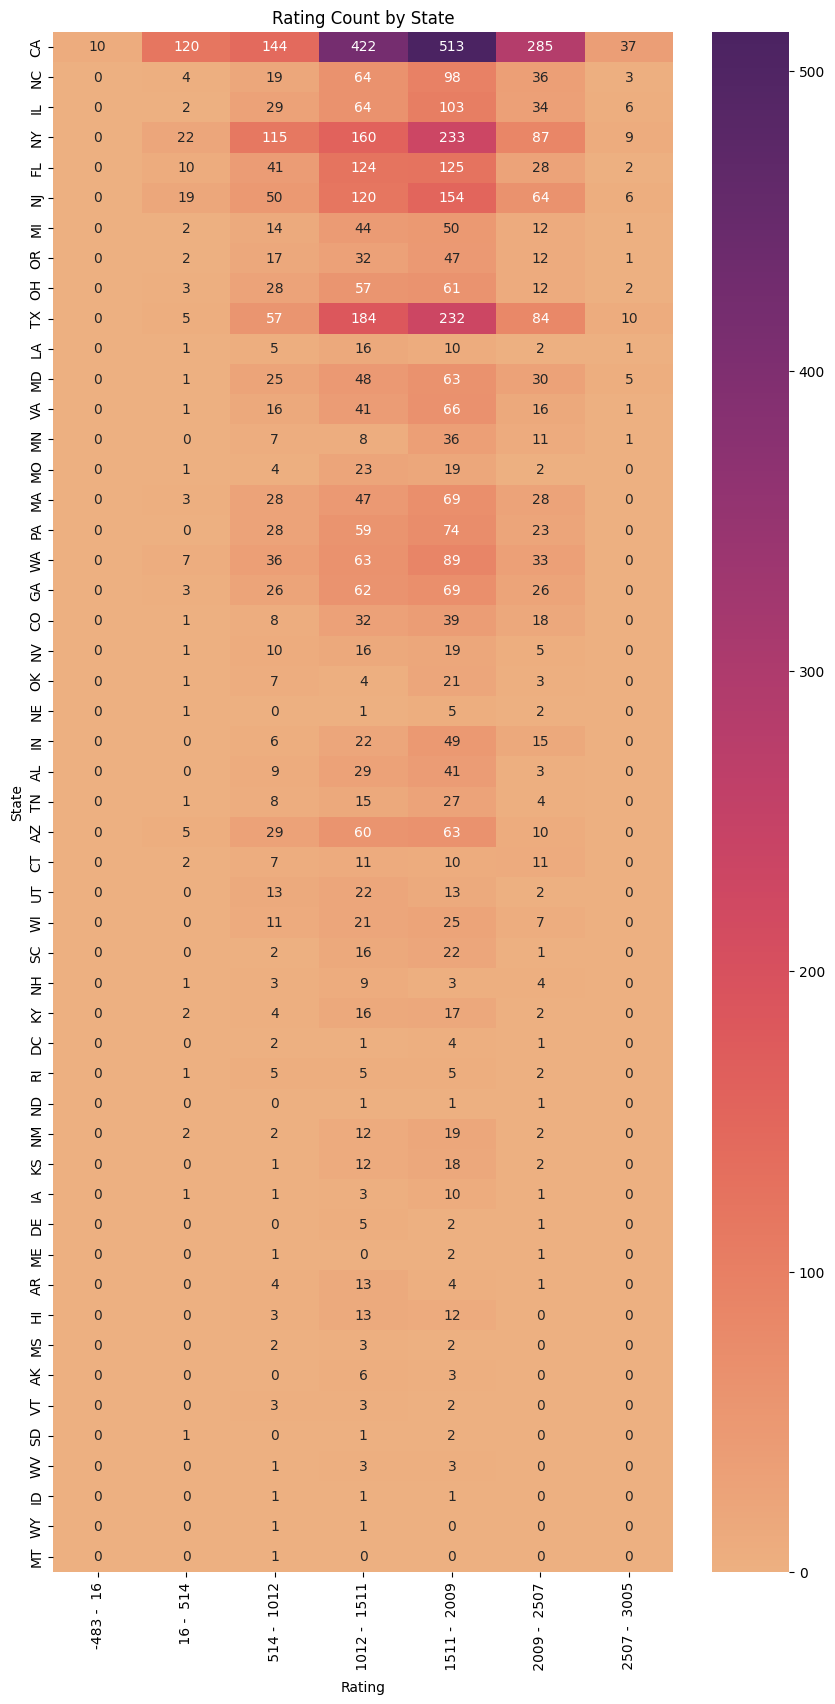

In [3]:
ratings = us_players['Tournament Rating']
mean = stat.mean(ratings)
std = stat.stdev(ratings)
bins = [mean + i * std for i in range(-4,4)]
labels = [f'{bins[i]: .0f} - {bins[i+1]: .0f}' for i in range(0,7)]

us_players['Range'] = pd.cut(ratings, bins, labels=labels)
buckets = pd.DataFrame(index=pd.Series(pd.unique(us_players['State'])), columns=labels)
for label in labels:
    p = us_players[us_players['Range'] == label][['State', 'Range']]
    buckets[label] = p.groupby('State').count()['Range']
buckets = buckets.fillna(0)

vmin = buckets.min(axis=None)
vmax = buckets.max(axis=None)
bucket_one = buckets.iloc[:len(buckets) // 2]
bucket_two = buckets.iloc[len(buckets) // 2:]

fig, axs = plt.subplots(figsize=(10,20))
sns.heatmap(buckets, vmin=vmin, vmax=vmax, cmap='flare', annot=True, fmt='.0f') # type: ignore
axs.set_title('Rating Count by State')
axs.set_xlabel('Rating')
axs.set_ylabel('State')